# Loan Application Status Prediction
# Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

import joblib

import warnings
warnings.filterwarnings('ignore')


In [2]:
loan=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
loan.shape

(614, 13)

In [4]:
loan.columns.to_list()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

# After the checking the dataset I observe that some columns need encoding.
but we will do this after chaecking the columns.

In [5]:
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

1 integer datatype
8 object datatype
4 float datatype is present in the Dataset


checking the null values present in the dataset

In [6]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

null values are present in the dataset but it is not huge to remove the column.

In [7]:
loan.isnull().sum().sum()

149

total 614 out of that 149 null values are present in the dataset.
we will fill it by other techique later.

In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


only Gender ,married Dependants,self employed, loan amount, loan amount term and credit history  have the null values

<AxesSubplot:>

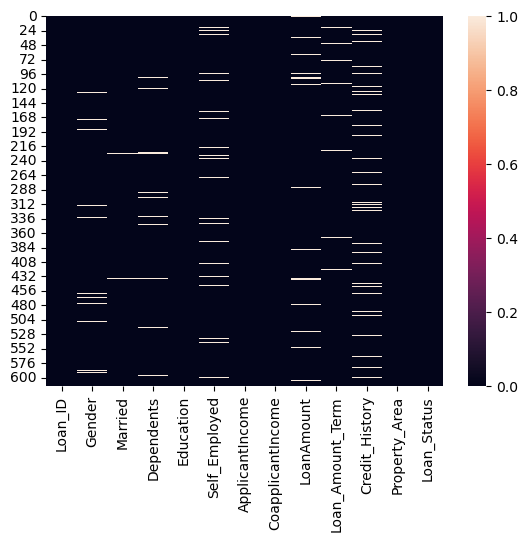

In [9]:
import seaborn as sns
sns.heatmap(loan.isnull())

less amount of data is null. so we can handle this by removing the null values

In [10]:
 # let's check the mode of gender column
loan['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [11]:
loan['Gender']  = loan['Gender'].fillna(loan['Gender'].mode()[0])

In [12]:
loan['Married'].mode()

0    Yes
Name: Married, dtype: object

In [13]:
loan['Married']=loan['Married'].fillna(loan['Married'].mode()[0])


In [14]:
loan['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [15]:
loan['Self_Employed']=loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0])

In [16]:
loan['LoanAmount'].mean()

146.41216216216216

In [17]:
loan['LoanAmount']= loan['LoanAmount'].fillna(loan['LoanAmount'].mean())

In [18]:
loan['Loan_Amount_Term'].median()

360.0

In [19]:
loan['Loan_Amount_Term'] = loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].median())

In [20]:
loan['Credit_History'].unique()

array([ 1.,  0., nan])

In [21]:
loan['Credit_History'].mode()

0    1.0
Name: Credit_History, dtype: float64

In [22]:
loan['Credit_History']  = loan['Credit_History'].fillna(loan['Credit_History'].mode()[0])

In [23]:
loan['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [24]:
loan['Dependents'].mode()

0    0
Name: Dependents, dtype: object

In [25]:
loan['Dependents'] = loan['Dependents'].fillna(loan['Dependents'].mode()[0])

<AxesSubplot:>

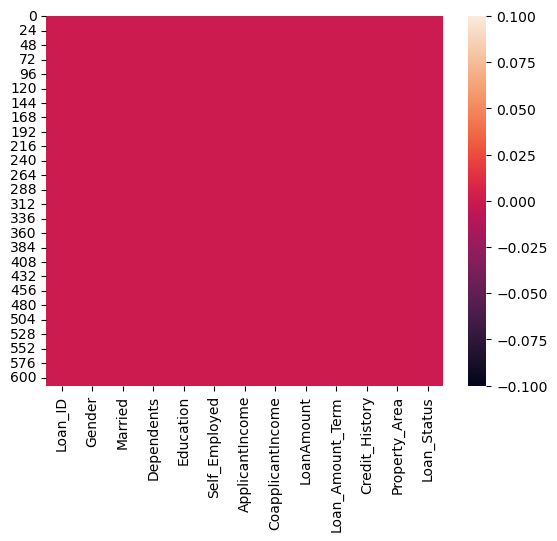

In [26]:
import seaborn as sns
sns.heatmap(loan.isnull())

no missing value present in the dataset right now. our data is without the null values

In [27]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Above cell gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/invalid values present. Observation :-

1.The counts of columns are same which means there are no missing values present in the dataset. 

2.The mean is more than the median(50%) in all the columns except Loan amount term and credit history which means they are skewed to right. 

3.The median is bit greate than the mean in the column Loan amount term and credit history which means it is skewed to left. 

4.From the difference between maximum and 75% we can infer that there are huge outliers present in most of the columns, will remove them using appropriate methods before building our model. 


# EDA

In [28]:
# 1. Loan ID
loan['Loan_ID'].describe()

count          614
unique         614
top       LP001002
freq             1
Name: Loan_ID, dtype: object

Each Loan taken individual having their own individual Loan_ID. But we know the fact, in anyway an individual's
Loan_ID is not going to create an impact on their Loan Status. So we can eliminate this column

In [29]:
loan.drop(['Loan_ID'],axis = 1, inplace = True)

In [30]:
# 2 Describe Gender column
loan['Gender'].describe()

count      614
unique       2
top       Male
freq       502
Name: Gender, dtype: object

Male      502
Female    112
Name: Gender, dtype: int64


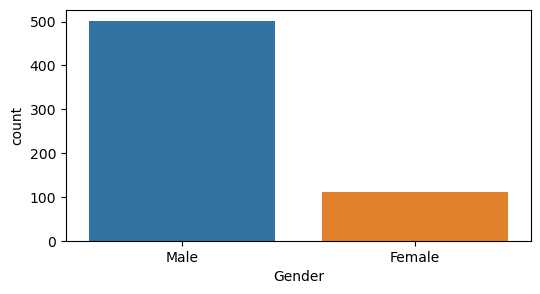

In [31]:
plt.figure(figsize=(6,3))
ax = sns.countplot(x = 'Gender', data = loan)
print(loan['Gender'].value_counts())

This graph indicated that male candidate has more apply for the loan as comapred to the female.

In [32]:
# lets check the target variable data is balence or not.

In [33]:
loan['Loan_Status'].describe()

count     614
unique      2
top         Y
freq      422
Name: Loan_Status, dtype: object

Y    422
N    192
Name: Loan_Status, dtype: int64


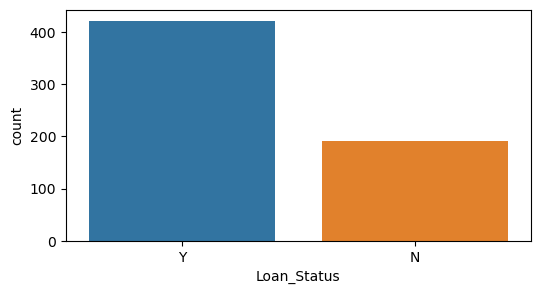

In [34]:
plt.figure(figsize=(6,3))
ax = sns.countplot(x = 'Loan_Status', data = loan)
print(loan['Loan_Status'].value_counts())

It seems that the data is imbalace in some extent. we will handle it later.

In [35]:
 #Describing Married column
loan['Married'].describe()


count     614
unique      2
top       Yes
freq      401
Name: Married, dtype: object

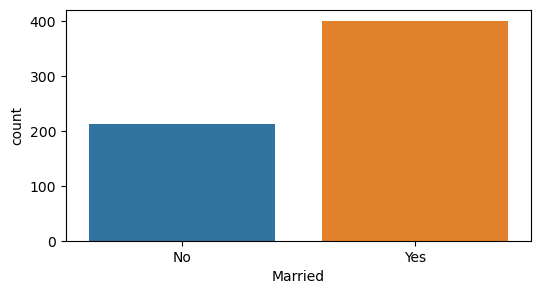

In [36]:
plt.figure(figsize=(6,3))
ax = sns.countplot(x = 'Married', data = loan)

most candidate are married who apply for the loan.

In [37]:
# 4 Describing Dependents column
loan['Dependents'].describe()

count     614
unique      4
top         0
freq      360
Name: Dependents, dtype: object

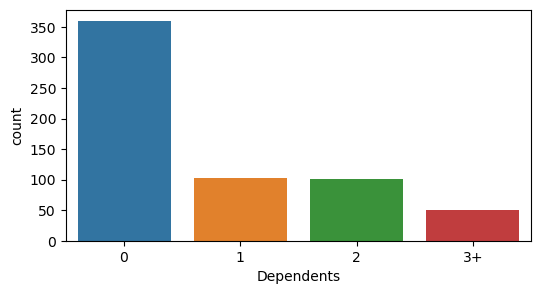

In [38]:
plt.figure(figsize=(6,3))
ax = sns.countplot(loan['Dependents'])

we observe that most of applicants has zero dependancy followed by the candidate has dependants 2

In [39]:
# Descriptive Statistics on EDucation columns
loan['Education'].describe()

count          614
unique           2
top       Graduate
freq           480
Name: Education, dtype: object

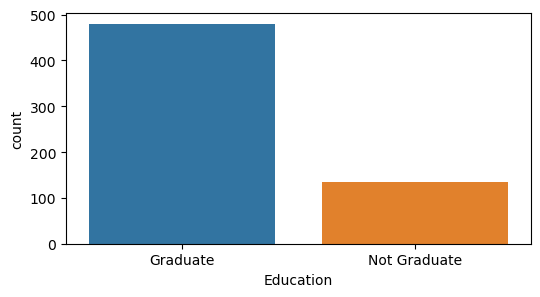

In [40]:
plt.figure(figsize=(6,3))
ax = sns.countplot(loan['Education'])

most of the candidate are graduate who apply for the loan.

In [41]:
# Descriptive Statistics on Self_Employed column
loan['Self_Employed'].describe()

count     614
unique      2
top        No
freq      532
Name: Self_Employed, dtype: object

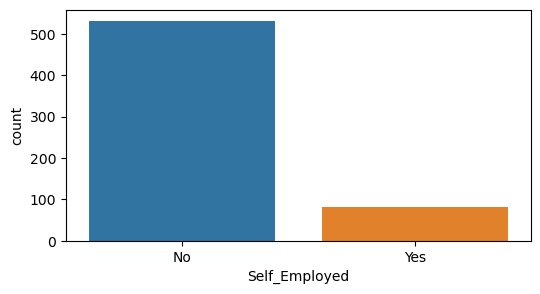

In [42]:
plt.figure(figsize=(6,3))
ax = sns.countplot(loan['Self_Employed'])

very few pepole are self employed as per the grpah.

In [43]:
#Descriptive Statistics on Applicant Income
loan['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

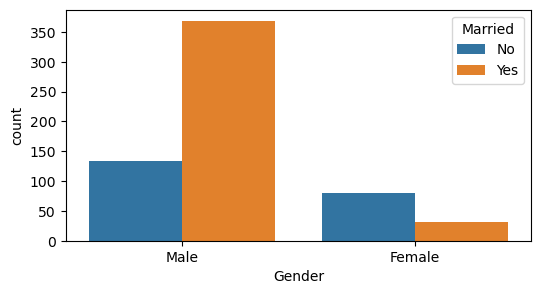

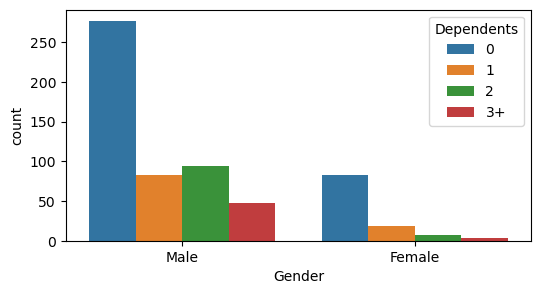

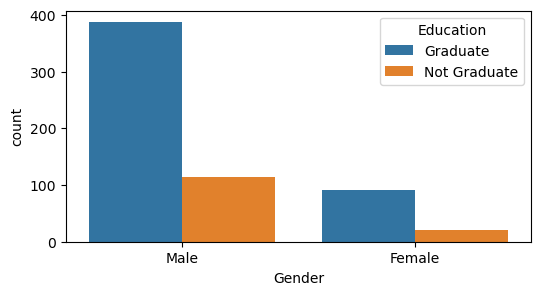

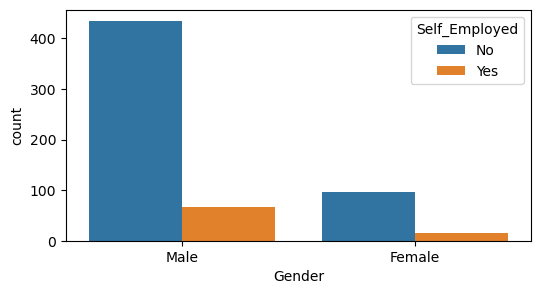

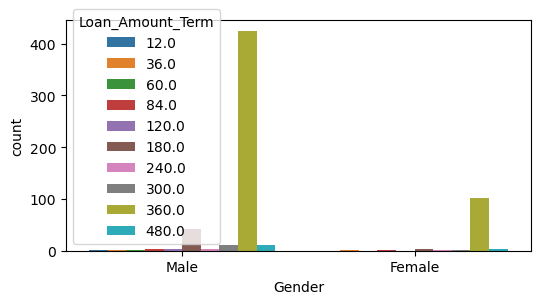

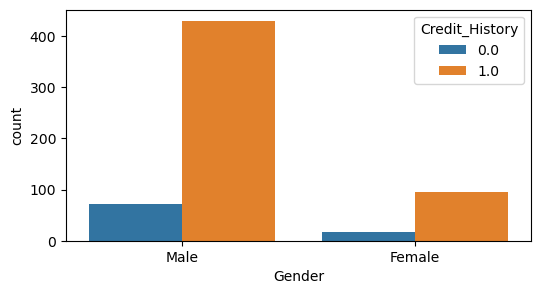

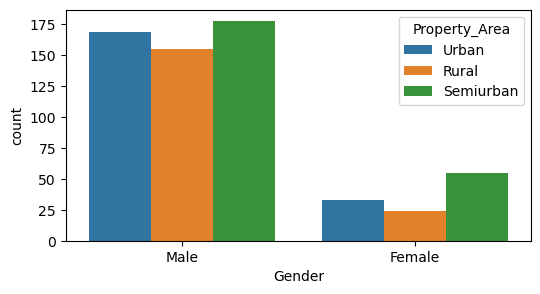

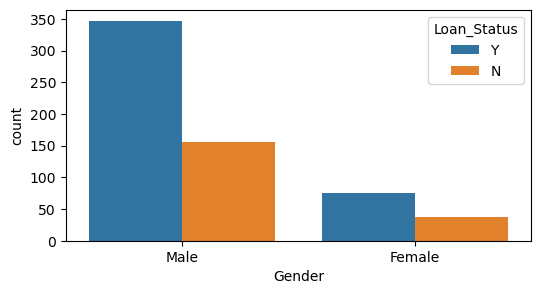

In [44]:
plt.figure(figsize=(6, 3))
ax = sns.countplot(x = 'Gender', data = loan, hue = 'Married')
plt.show()

plt.figure(figsize=(6, 3))
ax = sns.countplot(x = 'Gender', data = loan, hue = 'Dependents')
plt.show()

plt.figure(figsize=(6, 3))
ax= sns.countplot(x = 'Gender', data = loan, hue = 'Education')
plt.show()

plt.figure(figsize=(6, 3))
ax = sns.countplot(x = 'Gender', data = loan, hue = 'Self_Employed')

plt.show()
plt.figure(figsize=(6, 3))
ax = sns.countplot(x = 'Gender', data = loan, hue = 'Loan_Amount_Term')
plt.show()

plt.figure(figsize=(6, 3))
ax = sns.countplot(x = 'Gender', data = loan, hue = 'Credit_History')
plt.show()

plt.figure(figsize=(6, 3))
ax = sns.countplot(x = 'Gender', data = loan, hue = 'Property_Area')
plt.show()

plt.figure(figsize=(6,3))
ax = sns.countplot(x = 'Gender', data = loan, hue = 'Loan_Status')
plt.show()

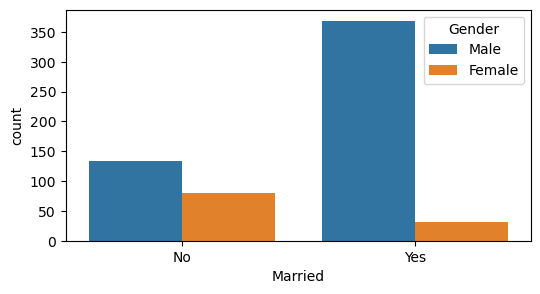

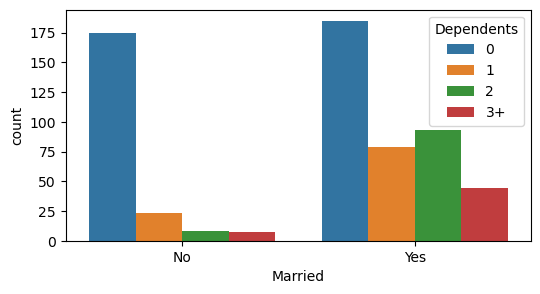

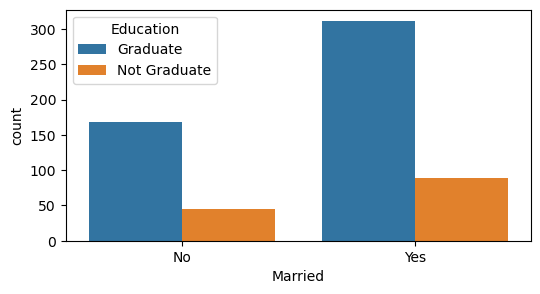

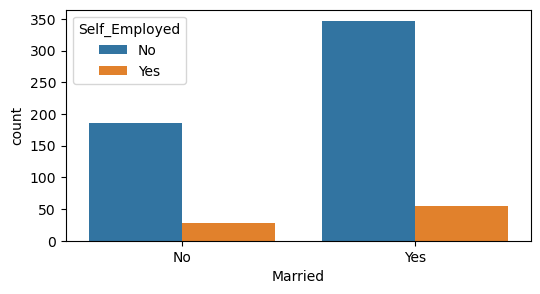

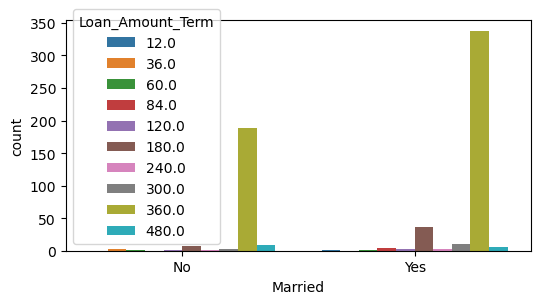

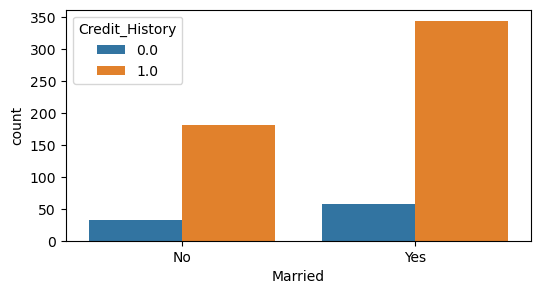

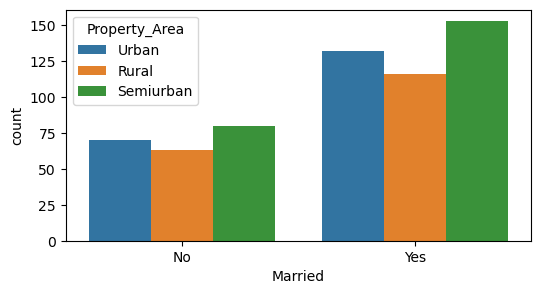

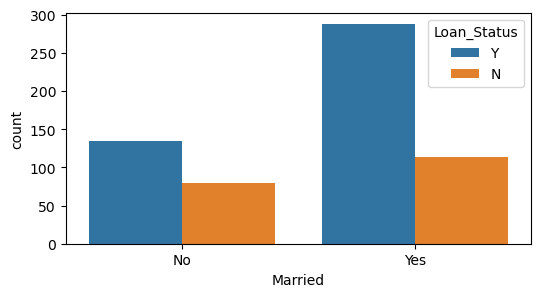

In [45]:
plt.figure(figsize=(6, 3))
ax = sns.countplot(x = 'Married', data = loan, hue = 'Gender')
plt.show()

plt.figure(figsize=(6, 3))
ax = sns.countplot(x = 'Married', data = loan, hue = 'Dependents')
plt.show()

plt.figure(figsize=(6, 3))
ax= sns.countplot(x = 'Married', data = loan, hue = 'Education')
plt.show()

plt.figure(figsize=(6, 3))
ax = sns.countplot(x = 'Married', data = loan, hue = 'Self_Employed')

plt.show()
plt.figure(figsize=(6, 3))
ax = sns.countplot(x = 'Married', data = loan, hue = 'Loan_Amount_Term')
plt.show()

plt.figure(figsize=(6, 3))
ax = sns.countplot(x = 'Married', data = loan, hue = 'Credit_History')
plt.show()

plt.figure(figsize=(6, 3))
ax = sns.countplot(x = 'Married', data = loan, hue = 'Property_Area')
plt.show()

plt.figure(figsize=(6,3))
ax = sns.countplot(x = 'Married', data = loan, hue = 'Loan_Status')
plt.show()

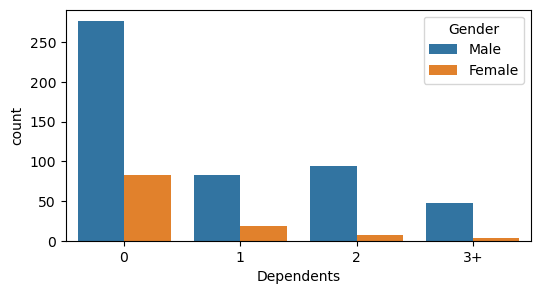

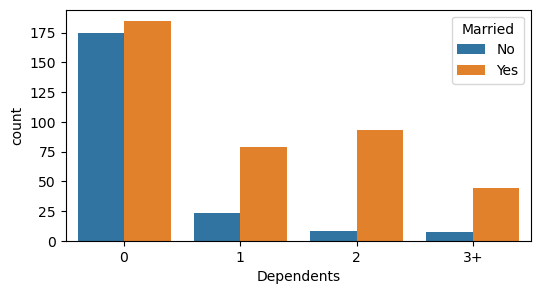

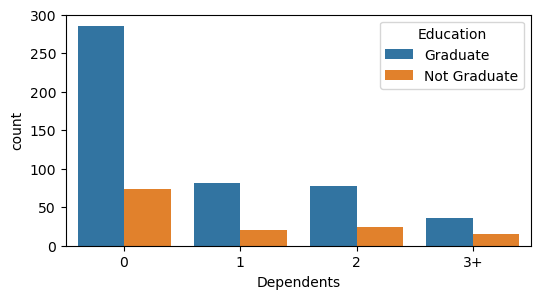

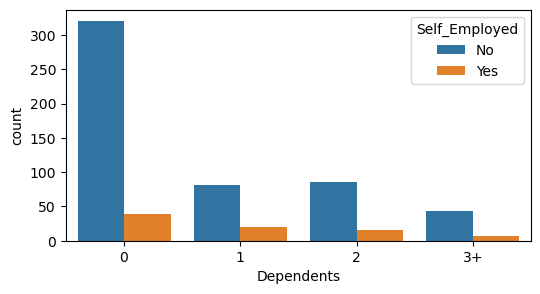

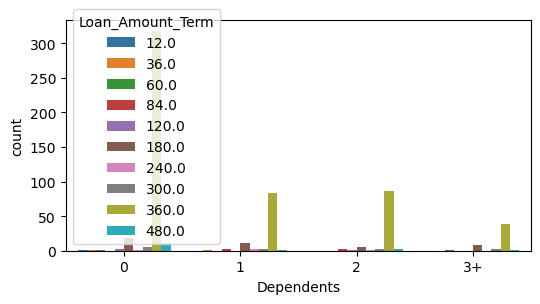

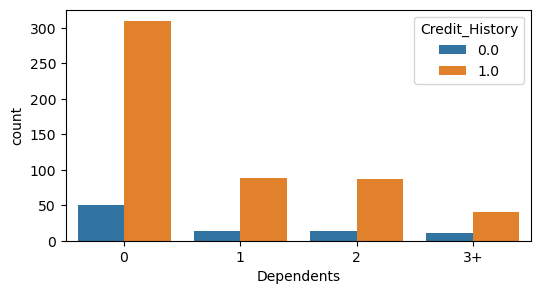

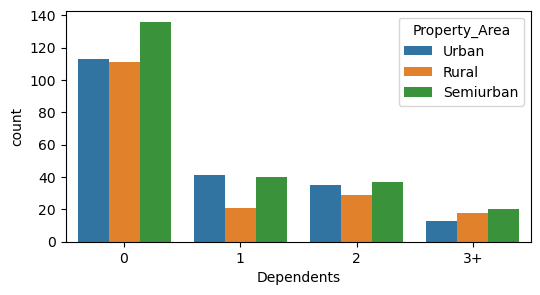

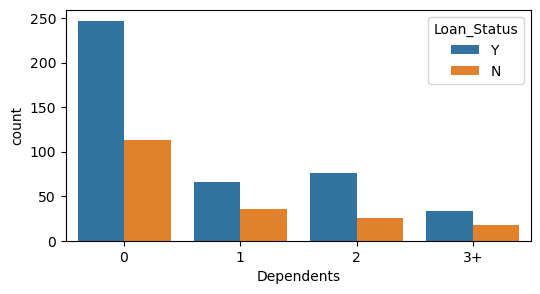

In [46]:
plt.figure(figsize=(6, 3))
ax = sns.countplot(x = 'Dependents', data = loan, hue = 'Gender')
plt.show()

plt.figure(figsize=(6, 3))
ax = sns.countplot(x = 'Dependents', data = loan, hue = 'Married')
plt.show()

plt.figure(figsize=(6, 3))
ax= sns.countplot(x = 'Dependents', data = loan, hue = 'Education')
plt.show()

plt.figure(figsize=(6, 3))
ax = sns.countplot(x = 'Dependents', data = loan, hue = 'Self_Employed')

plt.show()
plt.figure(figsize=(6, 3))
ax = sns.countplot(x = 'Dependents', data = loan, hue = 'Loan_Amount_Term')
plt.show()

plt.figure(figsize=(6, 3))
ax = sns.countplot(x = 'Dependents', data = loan, hue = 'Credit_History')
plt.show()

plt.figure(figsize=(6, 3))
ax = sns.countplot(x = 'Dependents', data = loan, hue = 'Property_Area')
plt.show()

plt.figure(figsize=(6,3))
ax = sns.countplot(x = 'Dependents', data = loan, hue = 'Loan_Status')
plt.show()

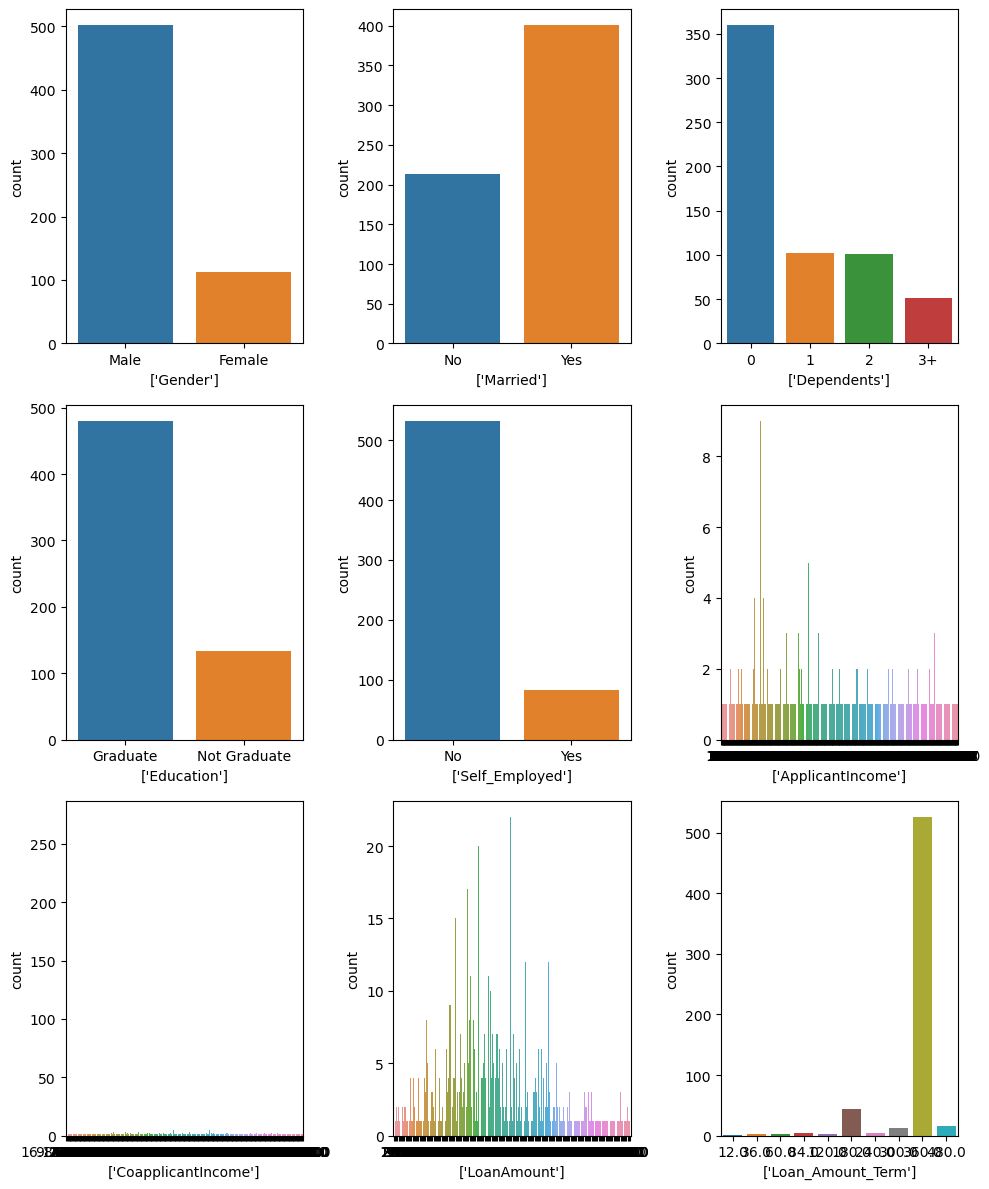

In [47]:
plt.figure(figsize = (10,12))
graph = 1

for Education in loan:
    if graph <=9:
        ax = plt.subplot(3,3,graph)
        sns.countplot(loan[Education])
        plt.xlabel([Education])
    graph +=1    
plt.tight_layout()    

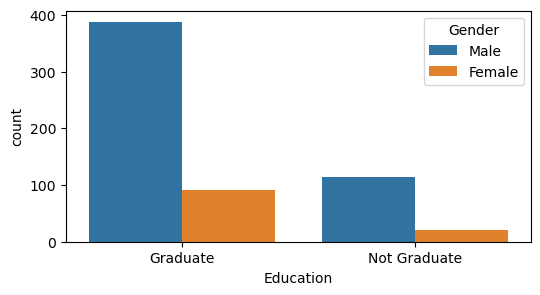

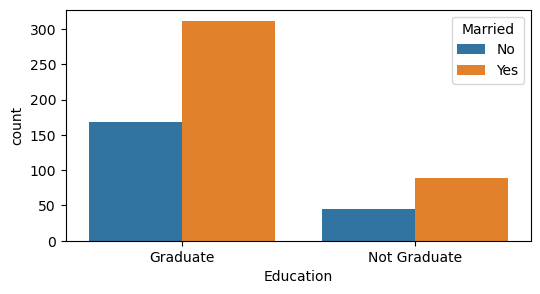

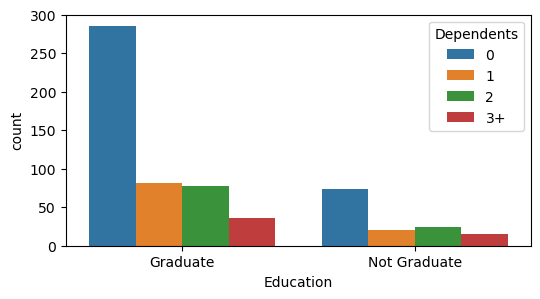

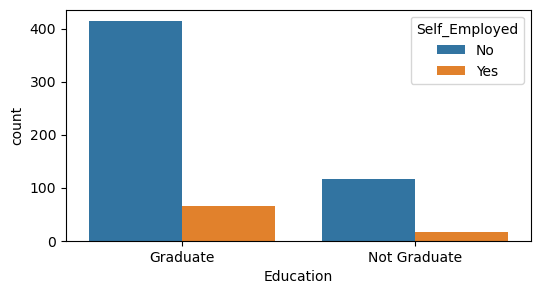

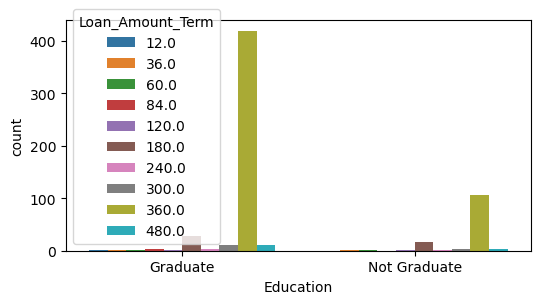

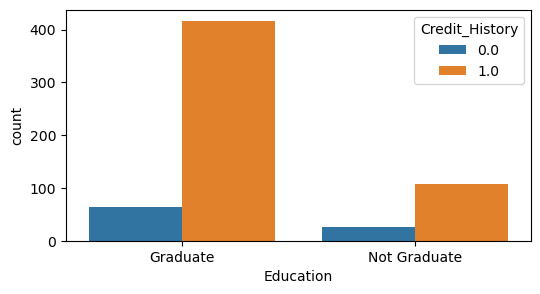

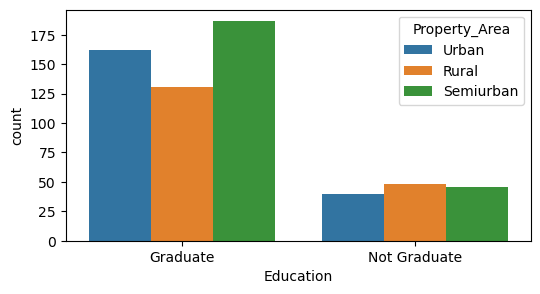

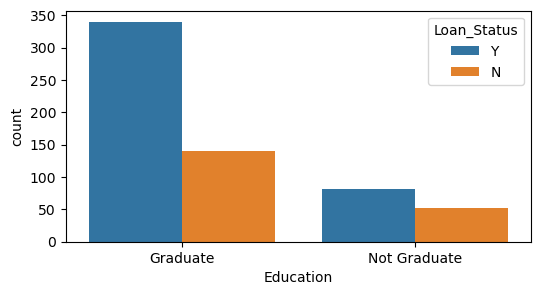

In [48]:
plt.figure(figsize=(6, 3))
ax = sns.countplot(x = 'Education', data = loan, hue = 'Gender')
plt.show()

plt.figure(figsize=(6, 3))
ax = sns.countplot(x = 'Education', data = loan, hue = 'Married')
plt.show()

plt.figure(figsize=(6, 3))
ax= sns.countplot(x = 'Education', data = loan, hue = 'Dependents')
plt.show()

plt.figure(figsize=(6, 3))
ax = sns.countplot(x = 'Education', data = loan, hue = 'Self_Employed')

plt.show()
plt.figure(figsize=(6, 3))
ax = sns.countplot(x = 'Education', data = loan, hue = 'Loan_Amount_Term')
plt.show()

plt.figure(figsize=(6, 3))
ax = sns.countplot(x = 'Education', data = loan, hue = 'Credit_History')
plt.show()

plt.figure(figsize=(6, 3))
ax = sns.countplot(x = 'Education', data = loan, hue = 'Property_Area')
plt.show()

plt.figure(figsize=(6,3))
ax = sns.countplot(x = 'Education', data = loan, hue = 'Loan_Status')
plt.show()

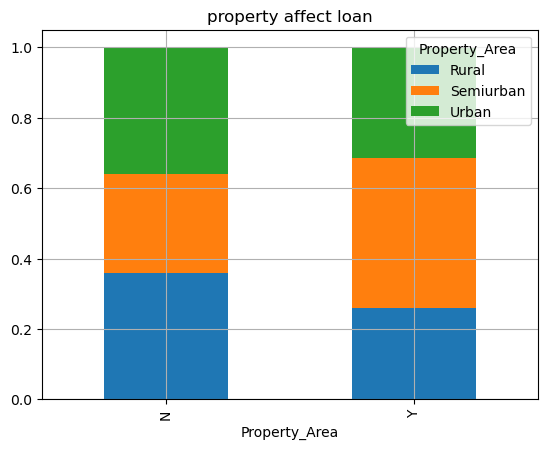

In [49]:
l_S_pa = pd.crosstab(loan['Loan_Status'],loan['Property_Area'])
l_S_pa = l_S_pa.div(l_S_pa.sum(1).astype(float), axis=0)
l_S_pa.plot(kind = 'bar', title = 'property affect loan',stacked=True, grid = True)
plt.xlabel('Property_Area')
plt.show()

we can observe that, the applicant who's proprty come in semiurban area has highest chances to get the loan as compare to the urban and rural.

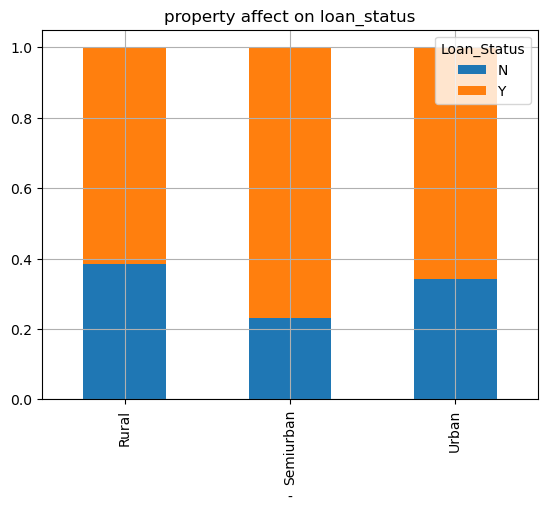

In [50]:
l_S_pa1 = pd.crosstab(loan['Property_Area'],loan['Loan_Status'])
l_S_pa1 = l_S_pa1.div(l_S_pa1.sum(1).astype(float), axis=0)
l_S_pa1.plot(kind = 'bar', title = 'property affect on loan_status',stacked=True, grid = True)
plt.xlabel('-')
plt.show()

# Comparing the target Loan_Status Types with other features

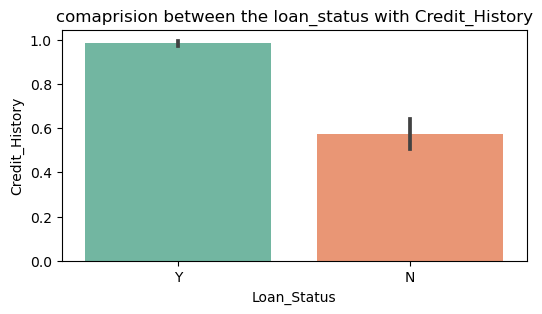

In [51]:
# lets check how the loan_status affect the education
plt.figure(figsize = (6,3))
plt.title('comaprision between the loan_status with Credit_History')

sns.barplot(x ='Loan_Status', y ='Credit_History', data = loan, palette = 'Set2')
plt.show()

In above cell we can clearly see that, credit history is 1 has more crediability for approve loan as compared to credit history zero

In [52]:
ls_se = pd.crosstab(loan['Loan_Status'],loan['Self_Employed'])
ls_se

Self_Employed,No,Yes
Loan_Status,,
N,166,26
Y,366,56


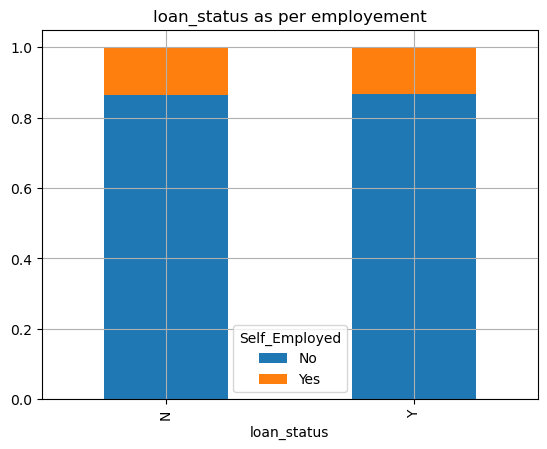

In [53]:
ls_se= ls_se.div(ls_se.sum(1).astype(float), axis=0)
ls_se.plot(kind = 'bar', title = 'loan_status as per employement',stacked=True, grid = True)
plt.xlabel('loan_status')
plt.show()

 Graph shows that loan status not considering a person if it is self emoloyed or not.

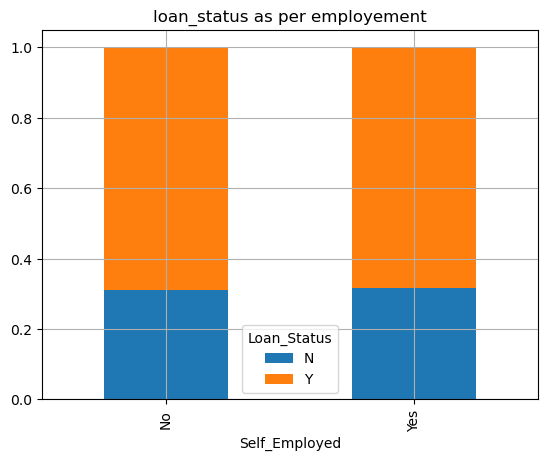

In [54]:
ls_se1 = pd.crosstab(loan['Self_Employed'],loan['Loan_Status'])
ls_se1= ls_se1.div(ls_se1.sum(1).astype(float), axis=0)
ls_se1.plot(kind = 'bar', title = 'loan_status as per employement',stacked=True, grid = True)
plt.xlabel('Self_Employed')
plt.show()

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

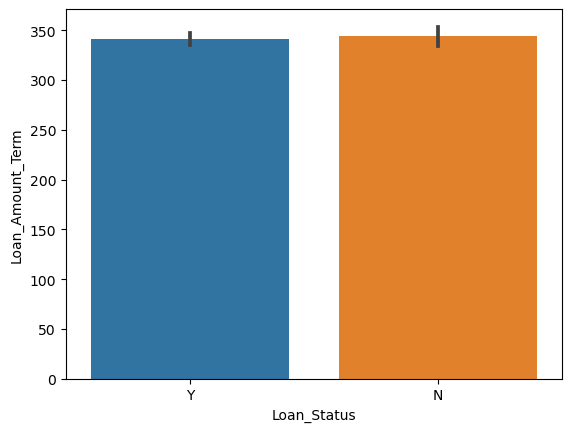

In [55]:
sns.barplot(x='Loan_Status', y='Loan_Amount_Term',data=loan)

graph shows Loan amount term is no much affect on the Loan status

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

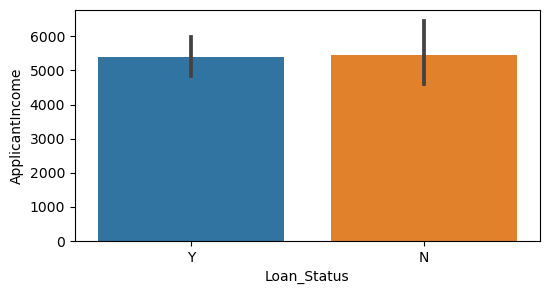

In [56]:
plt.figure(figsize=(6,3))
sns.barplot(x='Loan_Status', y='ApplicantIncome',data=loan)

Applicant Income doesnote give a clear picture that it decide for the loan_status.

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

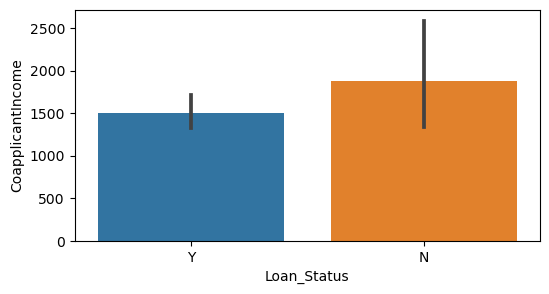

In [57]:
plt.figure(figsize=(6,3))
sns.barplot(x='Loan_Status', y='CoapplicantIncome',data=loan)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

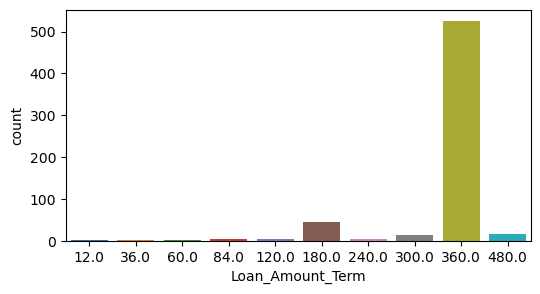

In [58]:
plt.figure(figsize=(6, 3))
sns.countplot(x = 'Loan_Amount_Term', data = loan)

most applicant term is 1 year or 360 days followed by 180 days.

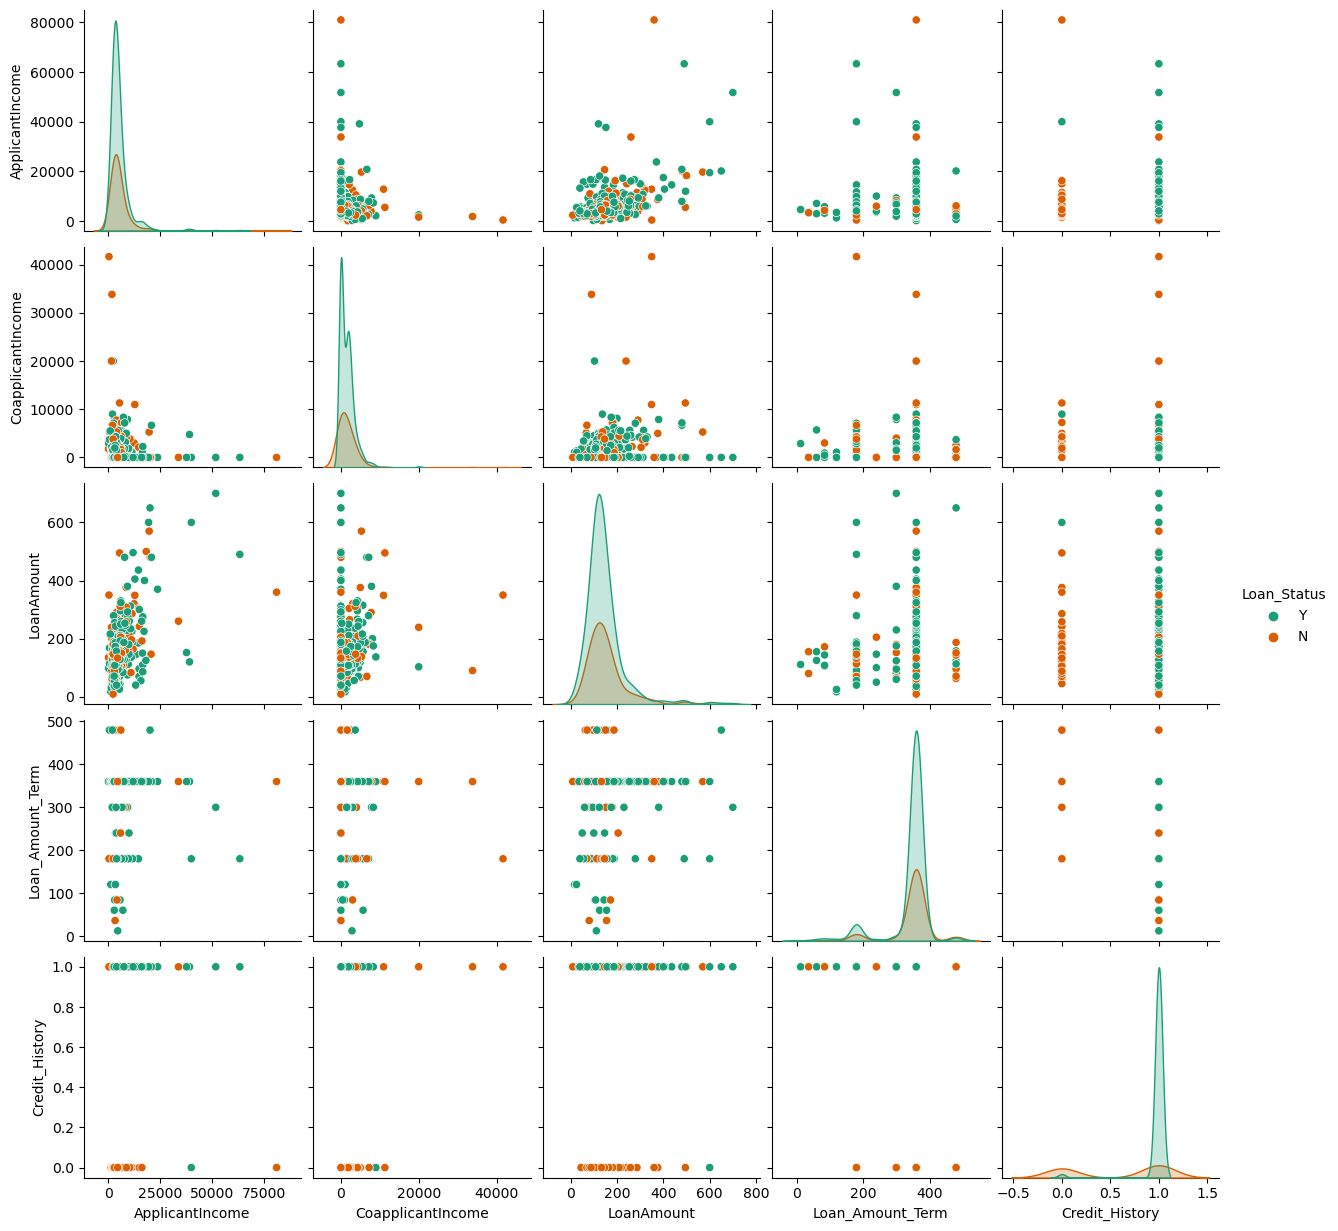

In [59]:
sns.pairplot(loan,hue = 'Loan_Status' ,palette = "Dark2")
plt.show()

we observe that here  loan_amount, applicant and co applocant income has relation with the our target veriable.

In [60]:
categorical_col=[]
for i in loan.dtypes.index:
    if loan.dtypes[i]=='object':
        categorical_col.append(i)
print('categorical columns : ', categorical_col)

numerical_col = []
for i in loan.dtypes.index:
    if loan.dtypes[i] != 'object':
        numerical_col.append(i)
        
print('Numerical columns : ', numerical_col)

categorical columns :  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
Numerical columns :  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


# Outliers Handling

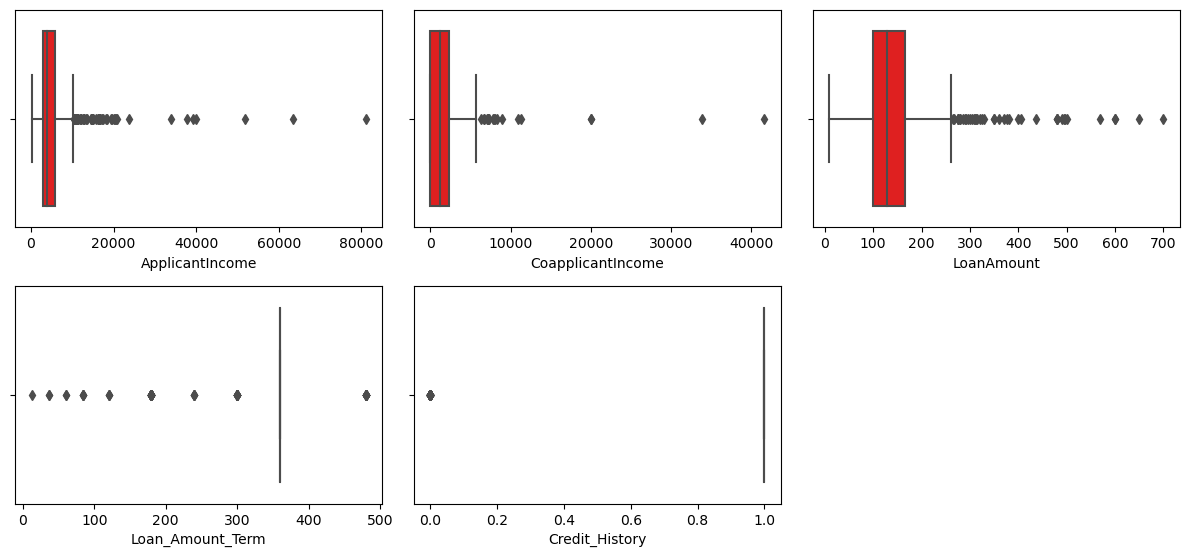

In [61]:
plt.figure(figsize = (12,8))
graph = 1
for column in numerical_col:
    if graph <=9:
        ax= plt.subplot(3,3,graph)
        sns.boxplot(loan[column],color = 'r')
        plt.xlabel(column,fontsize=10)
    graph +=1 
plt.tight_layout()

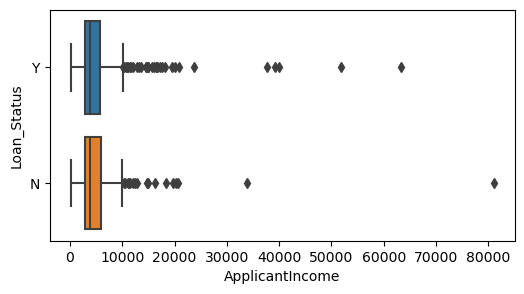

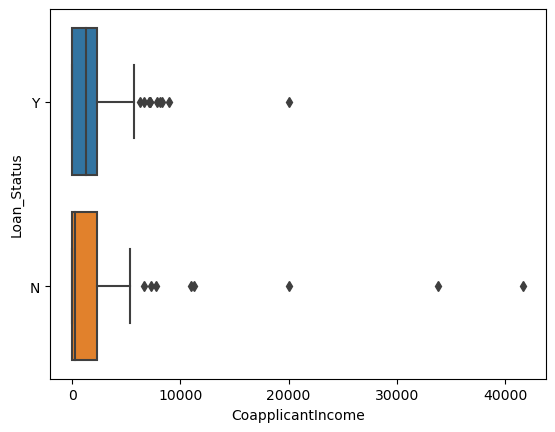

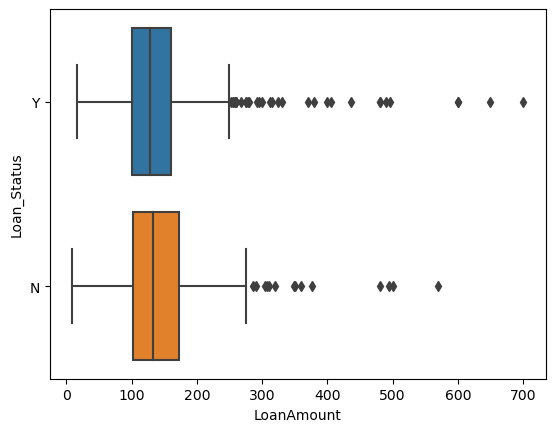

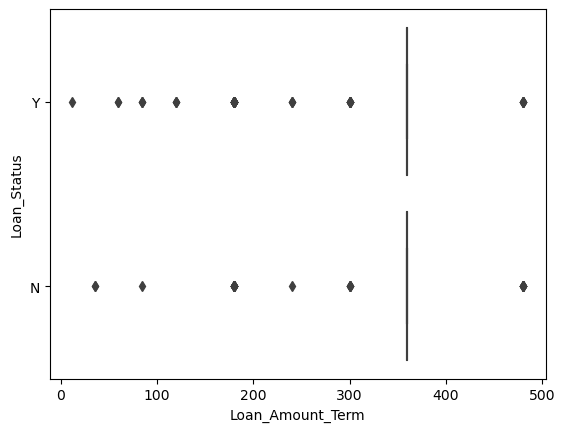

In [62]:
num_col = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
plt.figure(figsize=(6,3))
for column in num_col:
    sns.boxplot(x = column, y = 'Loan_Status', data = loan)
    plt.show()

In [63]:
# Display samples having outliers on ApplicantIncome
loan[loan['ApplicantIncome'] > 25000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
155,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
171,Male,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
183,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N
185,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
333,Male,Yes,0,Graduate,No,63337,0.0,490.0,180.0,1.0,Urban,Y
409,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N
443,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y


# Removing Outliers

In [64]:
loan['ApplicantIncome']=loan['ApplicantIncome'].astype(float)
loan['ApplicantIncome'].dtype

dtype('float64')

In [65]:
# features containing outliers
features =['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [66]:
#using zscore method to remove outliers
#from scipy.stats import zscore

#z= np.abs(zscore(features))
#z

In [67]:
samples_index_to_be_dropped = loan[loan['ApplicantIncome'] > 25000]
samples_index_to_be_dropped = samples_index_to_be_dropped[samples_index_to_be_dropped['Loan_Status'] == 'Y']
loan.drop(index = samples_index_to_be_dropped.index, inplace = True)
loan.reset_index(drop = True, inplace = True)

In [68]:
# Display samples having outliers on ApplicantIncome
loan[loan['CoapplicantIncome'] > 15000]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
398,Male,No,0,Graduate,No,2500.0,20000.0,103.0,360.0,1.0,Semiurban,Y
413,Male,Yes,2,Graduate,Yes,1600.0,20000.0,239.0,360.0,1.0,Urban,N
576,Male,No,0,Graduate,No,1836.0,33837.0,90.0,360.0,1.0,Urban,N
595,Female,No,3+,Graduate,No,416.0,41667.0,350.0,180.0,1.0,Urban,N


In [69]:
samples_index_to_be_dropped1 = loan[loan['CoapplicantIncome'] > 15000]
samples_index_to_be_dropped1 = samples_index_to_be_dropped1[samples_index_to_be_dropped1['Loan_Status'] == 'Y']
loan.drop(index = samples_index_to_be_dropped1.index, inplace = True)
loan.reset_index(drop = True, inplace = True)

In [70]:
# Display Samples having outliers on LoanAmount
loan[loan['LoanAmount'] > 400]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
130,Male,No,0,Graduate,Yes,20166.0,0.0,650.0,480.0,1.0,Urban,Y
175,Male,Yes,3+,Graduate,No,5516.0,11300.0,495.0,360.0,0.0,Semiurban,N
275,Male,Yes,0,Graduate,No,14583.0,0.0,436.0,360.0,1.0,Semiurban,Y
305,Male,No,0,Graduate,No,20233.0,0.0,480.0,360.0,1.0,Rural,N
365,Male,Yes,0,Graduate,No,19730.0,5266.0,570.0,360.0,1.0,Rural,N
427,Male,No,0,Graduate,No,12876.0,0.0,405.0,360.0,1.0,Semiurban,Y
481,Male,Yes,1,Graduate,No,18333.0,0.0,500.0,360.0,1.0,Urban,N
500,Male,Yes,0,Graduate,No,20833.0,6667.0,480.0,360.0,1.0,Urban,Y
517,Male,Yes,2,Graduate,Yes,7948.0,7166.0,480.0,360.0,1.0,Rural,Y
555,Female,Yes,1,Graduate,Yes,19484.0,0.0,600.0,360.0,1.0,Semiurban,Y


In [71]:
samples_index_to_be_dropped2 = loan[loan['LoanAmount'] > 400]
samples_index_to_be_dropped2 = samples_index_to_be_dropped2[samples_index_to_be_dropped2['Loan_Status'] == 'Y']
loan.drop(index = samples_index_to_be_dropped2.index, inplace = True)
loan.reset_index(drop = True, inplace = True)

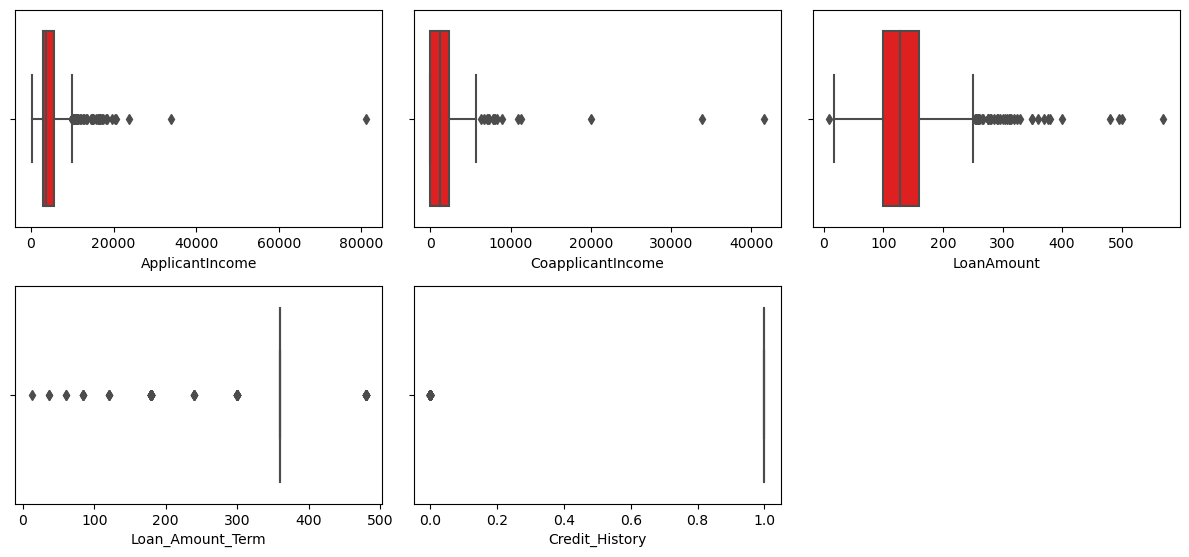

In [72]:
plt.figure(figsize = (12,8))
graph = 1
for column in numerical_col:
    if graph <=9:
        ax= plt.subplot(3,3,graph)
        sns.boxplot(loan[column],color = 'r')
        plt.xlabel(column,fontsize=10)
    graph +=1 
plt.tight_layout()

<Figure size 600x300 with 0 Axes>

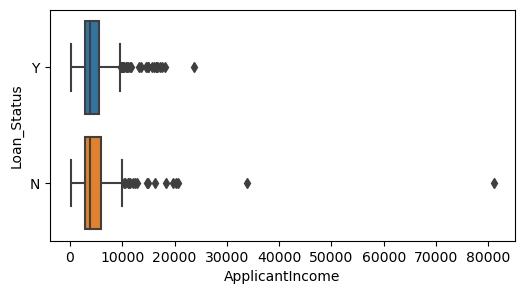

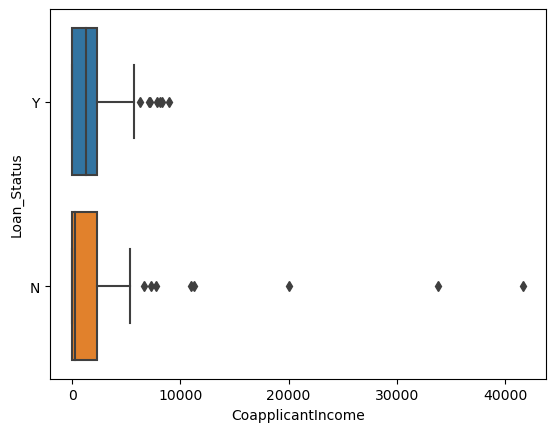

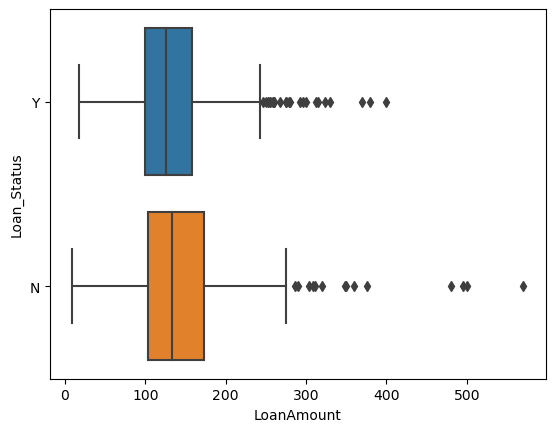

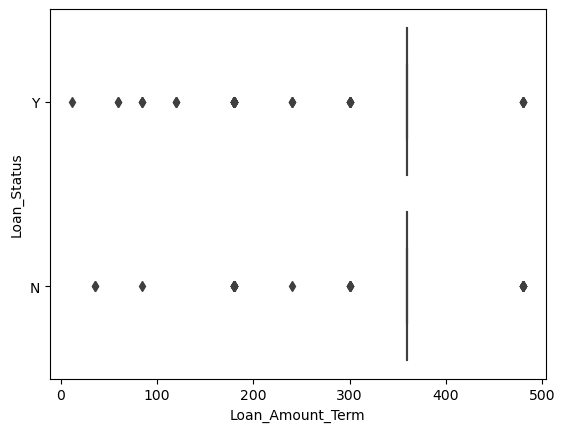

In [73]:
plt.figure(figsize=(6,3))
num_col = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
plt.figure(figsize=(6,3))
for column in num_col:
    sns.boxplot(x = column, y = 'Loan_Status', data = loan)
    plt.show()

# Lets Encode the categorical columns

In [74]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in loan.columns:
    if loan[i].dtypes =='object':
        loan[i]=oe.fit_transform(loan[i].values.reshape(-1,1 ))

In [75]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0


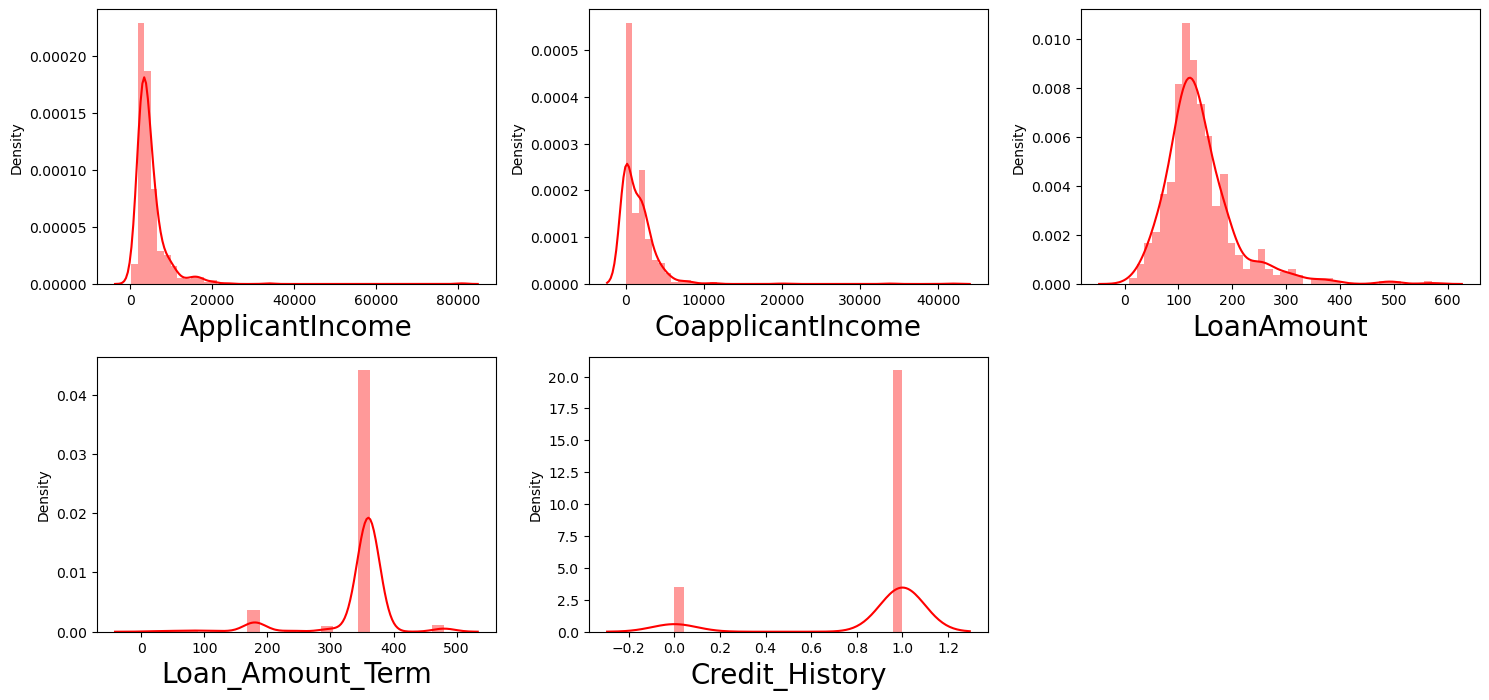

In [76]:
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(loan[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Observation :-

From the above distribution plots we can observe that the data is not normally distributed in all the columns except Loan Amount.

In most of the columns the mean is greater than the median which means they are skewed to right.

We will remove these skewness in all the coluns except the label in the later part

# Correlation between the target variable and features using HEAT MAP

In [77]:
cor = loan.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.377179,0.177949,0.046787,0.003536,0.051771,0.077535,0.144304,-0.072635,0.010875,-0.029073,0.017152
Married,0.377179,1.000000,0.333518,0.013421,0.001297,0.036984,0.089215,0.156433,-0.091772,0.013812,0.004222,0.091647
Dependents,0.177949,0.333518,1.000000,0.057815,0.059593,0.123562,0.041787,0.167454,-0.094604,-0.031304,0.002422,0.008800
Education,0.046787,0.013421,0.057815,1.000000,-0.004651,-0.135065,-0.059683,-0.160942,-0.076281,-0.072134,-0.063024,-0.078801
Self_Employed,0.003536,0.001297,0.059593,-0.004651,1.000000,0.140782,-0.022710,0.092142,-0.050470,-0.008109,-0.028792,-0.011484
ApplicantIncome,0.051771,0.036984,0.123562,-0.135065,0.140782,1.000000,-0.134805,0.472650,0.009398,-0.030148,-0.068271,-0.072933
CoapplicantIncome,0.077535,0.089215,0.041787,-0.059683,-0.022710,-0.134805,1.000000,0.268721,-0.070175,0.004740,0.015469,-0.069111
LoanAmount,0.144304,0.156433,0.167454,-0.160942,0.092142,0.472650,0.268721,1.000000,0.065949,-0.009103,-0.096770,-0.110765
Loan_Amount_Term,-0.072635,-0.091772,-0.094604,-0.076281,-0.050470,0.009398,-0.070175,0.065949,1.000000,-0.015969,-0.075649,-0.021739
Credit_History,0.010875,0.013812,-0.031304,-0.072134,-0.008109,-0.030148,0.004740,-0.009103,-0.015969,1.000000,-0.000426,0.543933


<AxesSubplot:>

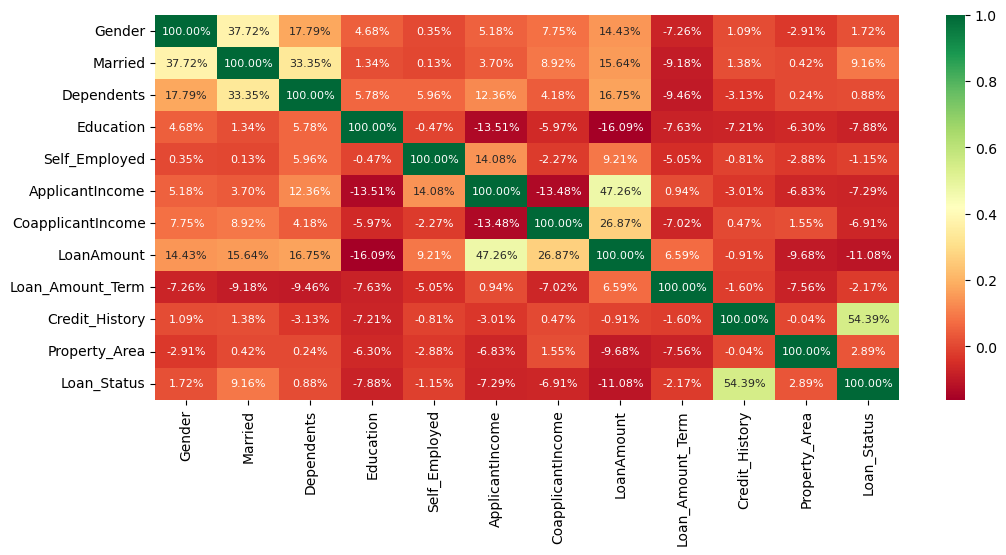

In [78]:
plt.figure(figsize=(12,5))
sns.heatmap(loan.corr(),fmt='.2%', annot = True, linecolor='black',annot_kws={'size':8},cmap = 'RdYlGn')

In [79]:
c= cor['Loan_Status'].sort_values(ascending =  False)
c

Loan_Status          1.000000
Credit_History       0.543933
Married              0.091647
Property_Area        0.028852
Gender               0.017152
Dependents           0.008800
Self_Employed       -0.011484
Loan_Amount_Term    -0.021739
CoapplicantIncome   -0.069111
ApplicantIncome     -0.072933
Education           -0.078801
LoanAmount          -0.110765
Name: Loan_Status, dtype: float64

In [80]:
# viusalizing the corelation between label and feature using bar plot

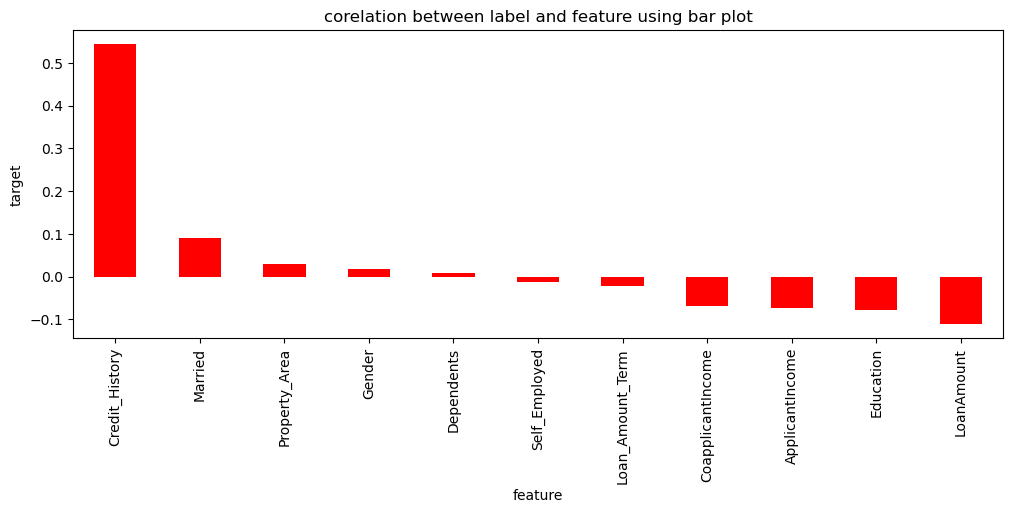

In [81]:
plt.figure(figsize=(12,4))
cor['Loan_Status'].sort_values(ascending = False).drop(['Loan_Status']).plot(kind = 'bar', color = 'r')
plt.xlabel('feature', fontsize = 10)
plt.ylabel('target', fontsize = 10)
plt.title('corelation between label and feature using bar plot')
plt.show()

This is the bar plot to check the correlation between Loan_Amount and features .

Here we can easily notice the positive and negative correlation between the features and the label

Here cerdit history is more affecting on loan status followed by the loan amount,Educaion and applicant income.

<AxesSubplot:>

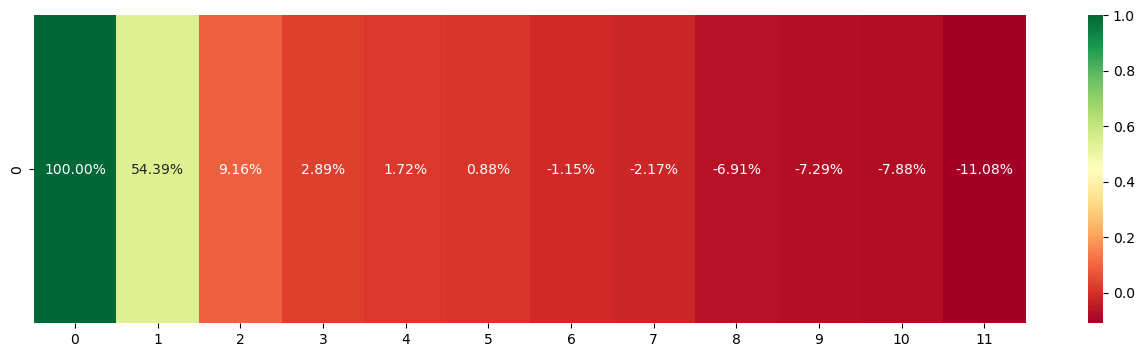

In [82]:
# Feature correlation with loan status
plt.figure(figsize = (16, 4))
sns.heatmap([c], cmap = 'RdYlGn', annot = True, fmt = '.2%')


As we obderve from the graph, loan status, married are highly affect with label.
Dependents nad self_emoloyed are the least affect on loan status.


0 Loan_Status          1.000000

1 Credit_History       0.543933

2 Married              0.091647

3 Property_Area        0.028852

4 Gender               0.017152

5 Dependents           0.008800

6 Self_Employed       -0.011484

7 Loan_Amount_Term    -0.021739

8 CoapplicantIncome   -0.069111

9 ApplicantIncome     -0.072933

10 Education           -0.078801

11 LoanAmount          -0.110765

In [83]:
# dropping the irrelavent colunmns
loan.drop(['Dependents','Self_Employed'] ,axis=1,inplace=True)
loan

,Gender,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,3000.0,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,1.0,2583.0,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
596,0.0,0.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0.0,1.0
597,1.0,1.0,0.0,4106.0,0.0,40.000000,180.0,1.0,0.0,1.0
598,1.0,1.0,0.0,8072.0,240.0,253.000000,360.0,1.0,2.0,1.0
599,1.0,1.0,0.0,7583.0,0.0,187.000000,360.0,1.0,2.0,1.0


# Prediction for our target varibale [Loan_Status]

In [84]:
# now we are doing scaling

In [85]:
# seperating feature and label
x = loan.drop('Loan_Status',axis = 1)  # feature
y = loan['Loan_Status']                # Label

In [86]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Gender,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.473321,-1.369525,-0.535666,0.193027,-0.562131,0.094246,0.272616,0.414174,1.223291
1,0.473321,0.730180,-0.535666,-0.079011,-0.029699,-0.179578,0.272616,0.414174,-1.307510
2,0.473321,0.730180,-0.535666,-0.419166,-0.562131,-1.101633,0.272616,0.414174,1.223291
3,0.473321,0.730180,1.866835,-0.508771,0.270412,-0.298552,0.272616,0.414174,1.223291
4,0.473321,-1.369525,-0.535666,0.225474,-0.562131,0.013757,0.272616,0.414174,1.223291
...,...,...,...,...,...,...,...,...,...
596,-2.112732,-1.369525,-0.535666,-0.440654,-0.562131,-1.027274,0.272616,0.414174,-1.307510
597,0.473321,0.730180,-0.535666,-0.181509,-0.562131,-1.488301,-2.536110,0.414174,-1.307510
598,0.473321,0.730180,-0.535666,0.670706,-0.477394,1.679405,0.272616,0.414174,1.223291
599,0.473321,0.730180,-0.535666,0.565629,-0.562131,0.697862,0.272616,0.414174,1.223291


In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif =  pd.DataFrame()
vif["vif values"] = [variance_inflation_factor(x.values,i)
                   for i in range(len(x.columns))]
vif["Features"] = x.columns

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['vif values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features'] = x.columns

In [89]:
vif

,vif values,features
0,1.184397,Gender
1,1.190998,Married
2,1.057576,Education
3,1.441036,ApplicantIncome
4,1.209522,CoapplicantIncome
5,1.585085,LoanAmount
6,1.039411,Loan_Amount_Term
7,1.007853,Credit_History
8,1.024466,Property_Area


if value 1 -> it s not correalted with the remaining coloumn if value 12--> it is 12 times corelate deiith remiaing features when there was no coliinerarity here vif threshold value is 5 but sometimes it is considered as 10 lets remove the feature which have high threshold value

In [90]:
y.value_counts()

1.0    409
0.0    192
Name: Loan_Status, dtype: int64

data is imbalance. lets balnce it by using SMOTE

In [91]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x,y =  sm.fit_resample(x,y)

In [92]:
y.value_counts()

1.0    409
0.0    409
Name: Loan_Status, dtype: int64

# checking Skewness

In [93]:
loan.skew()

Gender              -1.643516
Married             -0.640945
Education            1.334503
ApplicantIncome      8.439049
CoapplicantIncome    7.974450
LoanAmount           1.961732
Loan_Amount_Term    -2.455292
Credit_History      -2.005280
Property_Area       -0.059124
Loan_Status         -0.776307
dtype: float64

The following columns have skewness more than +/-0.5 only Married and Property Area are in range. others fectors are out of range so no need to remove skewness in these columns.

we use power tranformation to stablize the variance. make the data more normal disrtibution like 
Box-cox - This is use only positive values( > 0 )..not work on zero also Yeo-Johnson - This works on both positive and negative values

so in our mwthod we use Yeo-Johnson method.

In [94]:
skew = ['Gender', 'Education', 'ApplicantIncome','CoapplicantIncome',
        'LoanAmount','Loan_Amount_Term','Credit_History']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [95]:
x[skew] = scaler.fit_transform(x[skew].values)
x[skew]

,Gender,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.477973,-0.549068,0.779984,-1.056355,0.305428,0.127064,0.544088
1,0.477973,-0.549068,0.316359,0.379571,-0.026910,0.127064,0.544088
2,0.477973,-0.549068,-0.608789,-1.056355,-1.599228,0.127064,0.544088
3,0.477973,1.825410,-0.927394,0.836602,-0.191391,0.127064,0.544088
4,0.477973,-0.549068,0.823408,-1.056355,0.214452,0.127064,0.544088
...,...,...,...,...,...,...,...
813,0.477973,-0.549068,1.304093,0.837955,-0.068974,-0.950169,-1.841893
814,-2.100163,1.818588,-1.541574,-1.056355,0.258321,0.127064,-1.841893
815,0.477973,-0.549068,-0.503122,1.338240,0.741697,-0.936596,-1.841893
816,0.477973,1.825410,-0.749789,0.849324,-0.448607,-2.179928,-1.841893


In [96]:
# checking skewness after using yeo-johnson method
x.skew()

Gender              -1.620435
Married             -0.542484
Education            1.277146
ApplicantIncome      0.078857
CoapplicantIncome    0.263966
LoanAmount          -0.088573
Loan_Amount_Term     1.244379
Credit_History      -1.297853
Property_Area       -0.035503
dtype: float64

So here successfully removed the skewness from all the numerical columns using yeo-johnson method

Again check by plottting distribution plot

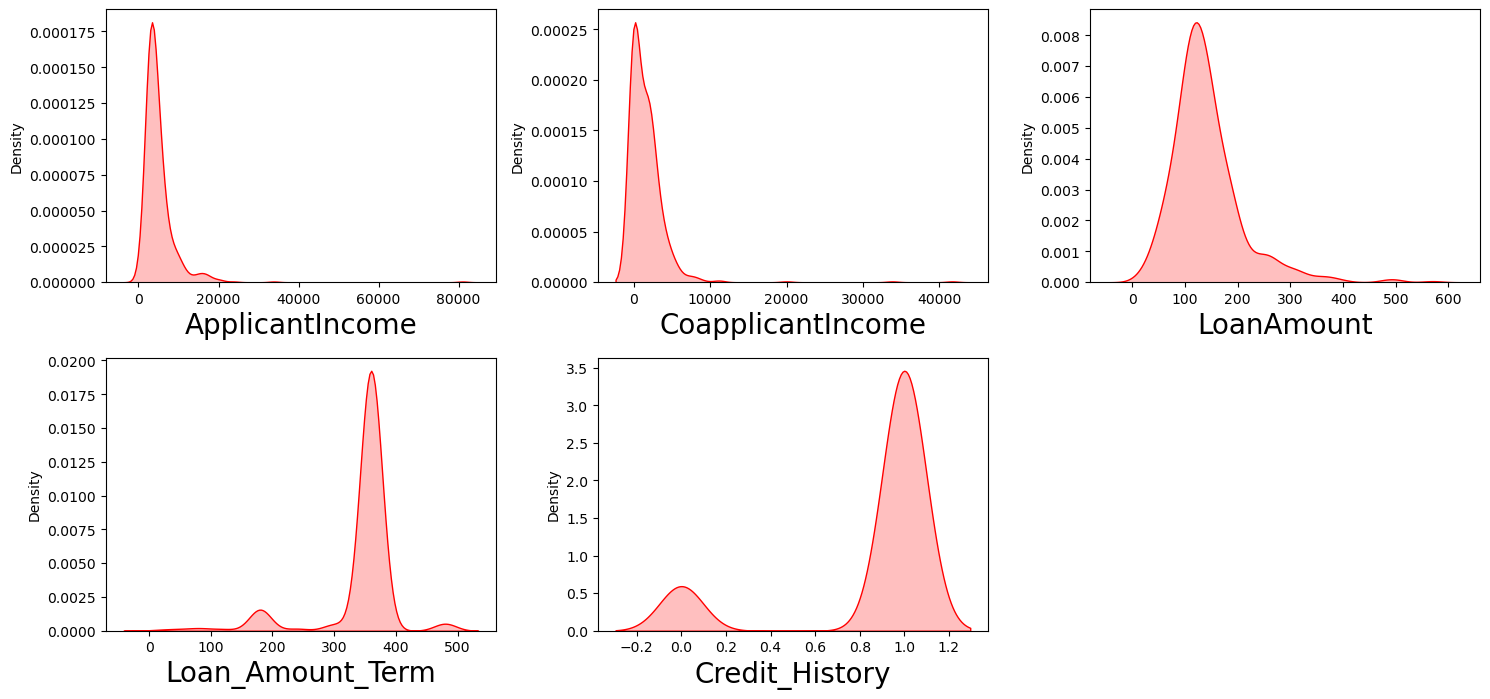

In [97]:
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(loan[column],color='r',hist=False, kde_kws ={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

The data is not normal but the skewness has been reduced in all the columns.

In [98]:
scaler = StandardScaler()
x =pd.DataFrame(scaler.fit_transform(x),columns = x.columns)

In [99]:
x

,Gender,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477973,-1.319573,-0.549068,0.779984,-1.056355,0.305428,0.127064,0.544088,1.235493
1,0.477973,0.771863,-0.549068,0.316359,0.379571,-0.026910,0.127064,0.544088,-1.284392
2,0.477973,0.771863,-0.549068,-0.608789,-1.056355,-1.599228,0.127064,0.544088,1.235493
3,0.477973,0.771863,1.825410,-0.927394,0.836602,-0.191391,0.127064,0.544088,1.235493
4,0.477973,-1.319573,-0.549068,0.823408,-1.056355,0.214452,0.127064,0.544088,1.235493
...,...,...,...,...,...,...,...,...,...
813,0.477973,0.771863,-0.549068,1.304093,0.837955,-0.068974,-0.950169,-1.841893,1.235493
814,-2.100163,-1.319573,1.818588,-1.541574,-1.056355,0.258321,0.127064,-1.841893,1.235493
815,0.477973,0.771863,-0.549068,-0.503122,1.338240,0.741697,-0.936596,-1.841893,-0.024450
816,0.477973,0.771863,1.825410,-0.749789,0.849324,-0.448607,-2.179928,-1.841893,0.214450


So here scaled the data using standard scalarization method to overcome with the issue of data biasness.

As we have observed in the heat map there is multicolinearity issue exists in the data. So let's check the VIF value and if the columns have VIF > 10 then we can drop those columns

In [100]:
# Again check Vif Values
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features'] = x.columns
vif

,VIF values,features
0,1.240916,Gender
1,1.289222,Married
2,1.081302,Education
3,1.932650,ApplicantIncome
4,1.630678,CoapplicantIncome
5,1.819446,LoanAmount
6,1.036982,Loan_Amount_Term
7,1.014527,Credit_History
8,1.032431,Property_Area


So here we can observe all the columns have VIF less than 10 .

Which means we are free from multicolinearity problem 

# Model Building

In [101]:
MaxAccu = 0
maxRS = 0
for i in range(1,400):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = i)
    
RFR = RandomForestClassifier()
RFR.fit(x_train,y_train)
pred = RFR.predict(x_test)
acc = accuracy_score(y_test,pred)

if acc>MaxAccu:
    MaxAccu = acc
    maxRS = i
    
print("Best accuracy is", MaxAccu, "at random state", maxRS)

Best accuracy is 0.7845528455284553 at random state 399


# creating train test split

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = maxRS)

In [103]:
print('value for x train is ,',x_train.shape)
print('value for x test is ,',x_test.shape)
print('value for y train is ,',y_train.shape)
print('value for y test is,'    ,y_test.shape)

value for x train is , (572, 9)
value for x test is , (246, 9)
value for y train is , (572,)
value for y test is, (246,)


In our Dataset we take 572 rows for train and 246 rows for test

# we directely learn our model and do cross validation with  respect to that.

In [104]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits= 5,shuffle = True, random_state = maxRS)

In [105]:
clf  = KNeighborsClassifier(n_neighbors = 6)
scoring = 'accuracy'
score = cross_val_score(clf,x,y, cv = kfold, n_jobs=1, scoring= scoring)
print(score)

[0.73170732 0.75609756 0.75609756 0.73619632 0.6809816 ]


In [106]:
#learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
clf = [KNeighborsClassifier(n_neighbors = 5),DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=5),GaussianNB(),SVC(),ExtraTreesClassifier(),
      GradientBoostingClassifier(n_estimators=5, learning_rate=1,max_features=3, max_depth =3, random_state = maxRS),
       AdaBoostClassifier(),ExtraTreesClassifier()]
def model_fit():
    scoring = 'accuracy'
    for i in range(len(clf)):
        score = cross_val_score(clf[i] ,x,y, cv = kfold , n_jobs=1, scoring=scoring)
        print("Score of Model",i,":",round(np.mean(score)*100,2))
#     round(np.mean(score)*100,2)
#     print("Score of :\n",score)
model_fit()

Score of Model 0 : 72.13
Score of Model 1 : 75.8
Score of Model 2 : 78.96
Score of Model 3 : 71.52
Score of Model 4 : 75.18
Score of Model 5 : 82.88
Score of Model 6 : 72.99
Score of Model 7 : 74.58
Score of Model 8 : 83.12


Extra tress Classifier is our best machine learnng model.
but still we need to improve its accuracy by doing hyper parameter.

# Hyper Tunning Parameter

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 399)

In [108]:
parameters = {'criterion': ['gini','entropy'], 
              'random_state': [10,50,1000], 
              'max_depth':[0,10,20],
              'n_jobs':[-2,-1,1], 
              'n_estimators': [50,100,200,300]}

In [109]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameters, cv=5)

In [110]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [111]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 50,
 'n_jobs': -2,
 'random_state': 10}

In [112]:
final_model = ExtraTreesClassifier(criterion = 'gini',
 max_depth = 20,
 n_estimators = 200,
 n_jobs = -2,
 random_state = 1000)

final_model.fit(x_train, y_train)
pred = final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

78.86178861788618


Accuracy after hyper tunning is 78.4%

# ROC AUC

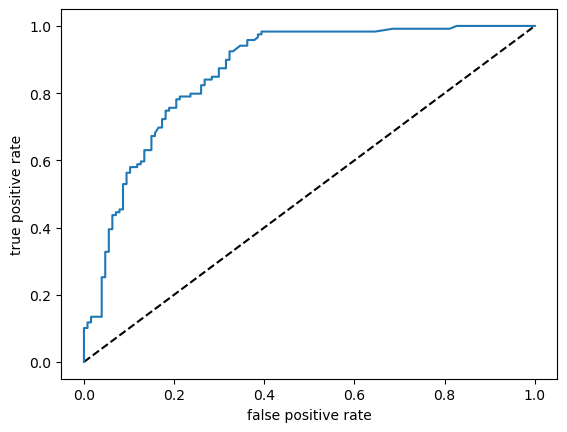

Auc score:   
 0.7920995169721431


In [113]:
y_pred_prob = final_model.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr,label = 'ExtraTressClassifier(area = %0.2f)'% roc_auc)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

auc_score = roc_auc_score(y_test, final_model.predict(x_test))
print('Auc score: ', '','\n', auc_score)

This is one of the performance parameter. IT IS USE roc FOR BINARY classification problem. so you cannot use for multiclass classifiaction. it creates probablity curve tPR against the fpr as va threshold. it seperate the signal eom the noise. AUC that use to masure the ability of your binary classifier to distingwish between the classes. also give summary of a roc curve [:, 1] there are two classes so we are selecting one of them.

false postive rate-> Basically FPR tells us what proportion of negative class got in correctly classified by the classifier.

True positive rate ---> Reacall/ sensitivity


so higher the auc score / value better the performance of model and our modeling is your classifier is able to distingwwish between positive ad negative classes. range is 0 to 1 it it is 1 -> classifier is correctely distingwish between the classes. if it is 0 --> classifier is not perfectly classify between the classes. 0.5---------> not bale to distinwish between thr two classes

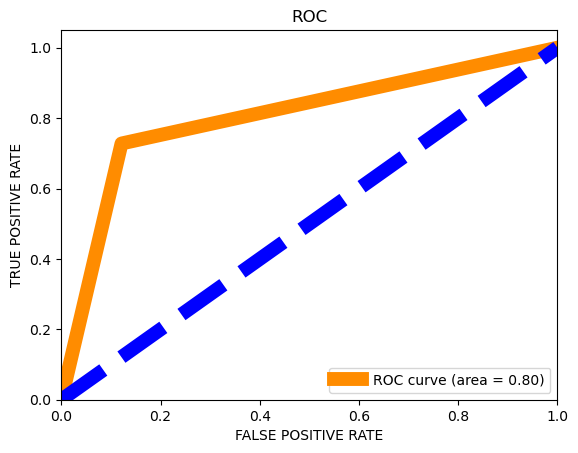

In [114]:
fpr,tpr,threshold = roc_curve(pred, y_test)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color = 'darkorange', lw = 10, label = 'ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1], color = 'blue', lw = 10, linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("ROC")
plt.legend(loc = "lower right")
plt.show()

# Saving the model

saving the model using .pkl and also predicting the saved model

In [115]:
import joblib
joblib.dump(final_model, "Loan_Application_Analysis.pkl")

['Loan_Application_Analysis.pkl']

In [116]:
model = joblib.load("Loan_Application_Analysis.pkl")
prediction = model.predict(x_test)
prediction

array([1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 1.

These are the predicted Laon_status value of the customers.It is always stored in an array format not in DataFrame so, you can convert it into DataFrame

In [117]:
a= np.array(y_test)
data = pd.DataFrame()
data["predicted"] = prediction
data["original"]  = a
data

,predicted,original
0,1.0,1.0
1,0.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,0.0
...,...,...
241,1.0,1.0
242,0.0,0.0
243,1.0,1.0
244,1.0,1.0


Creating dataframe

In [118]:
conclusion = pd.DataFrame([model.predict(x_test)[:], y_test[:]], index = ["predicted", "original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,236,237,238,239,240,241,242,243,244,245
predicted,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
original,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
